## EXTRACCIÓN

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/telecomx-data-limpio.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [141]:
# Ver las columnas disponibles
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [142]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

 Verificar si hay valores únicos en cada columna. Si no son demasiados valores se muestran en pantalla $(<20)$.

In [143]:
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 20:
    print(df[col].unique())
    print('_' * 60)

valores únicos en la columna'customerID': 7043
valores únicos en la columna'Churn': 2
['No' 'Yes']
____________________________________________________________
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
____________________________________________________________
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
____________________________________________________________
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
____________________________________________________________
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
____________________________________________________________
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
____________________________________________________________
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
____________________________________________________________
valores únicos e

##🛠️ Preparación de los Datos


Se remueven columnas irrelevantes. Quedan excluidas del análisis variables que:

 * No tienen valor predictivo (ej.: identificadores únicos).
 * Son redundantes con otras.
 * Pueden causar fuga de datos (*data leakage*).


1. Eliminando el ID

In [144]:
df = df.drop(columns=['customerID'])

2. Agrupación de "No" y "No service"

Si el cliente no tiene contratado el servicio de internet, tampoco tendrá ninguno de los otros servicios que dependen de él, como por ejemplo, `TechSuport`. Esto genera **multicolinealidad perfecta**. Debido a lo anterior es que para evitar "VIF infinito" y comprometer la estabilidad y el rendimiento de los modelos se procede a agrupar las siguiente columnas:
  * internet.OnlineSecurity
  * internet.OnlineBackup
  * internet.DeviceProtection
  * internet.TechSupport
  * internet.StreamingTV
  * internet.StreamingMovies




In [145]:
# creando un nuevo dataframe
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# ¡Listo para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [146]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [147]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


**Tratamiento de valores nulos**

Al identificar valores nulos en las columnas `Total.Day` y `account.Charges.Total`, es necesario decidir entre **eliminar** o **rellenar** esas entradas. Como el número de valores nulos es pequeño (11 filas en más de 7 mil), podemos eliminar esas filas sin afectar el análisis. Esto evita introducir distorsiones en los resultados.

In [148]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [149]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                0
account.Charges.Total    0
dtype: int64


In [150]:
# Proporción de clientes con y sin churn
proporcion_churn = df['Churn'].value_counts(normalize=True)

print(proporcion_churn)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


## ≡ Correlación entre las variables


In [151]:
corr = df_encoded.corr()

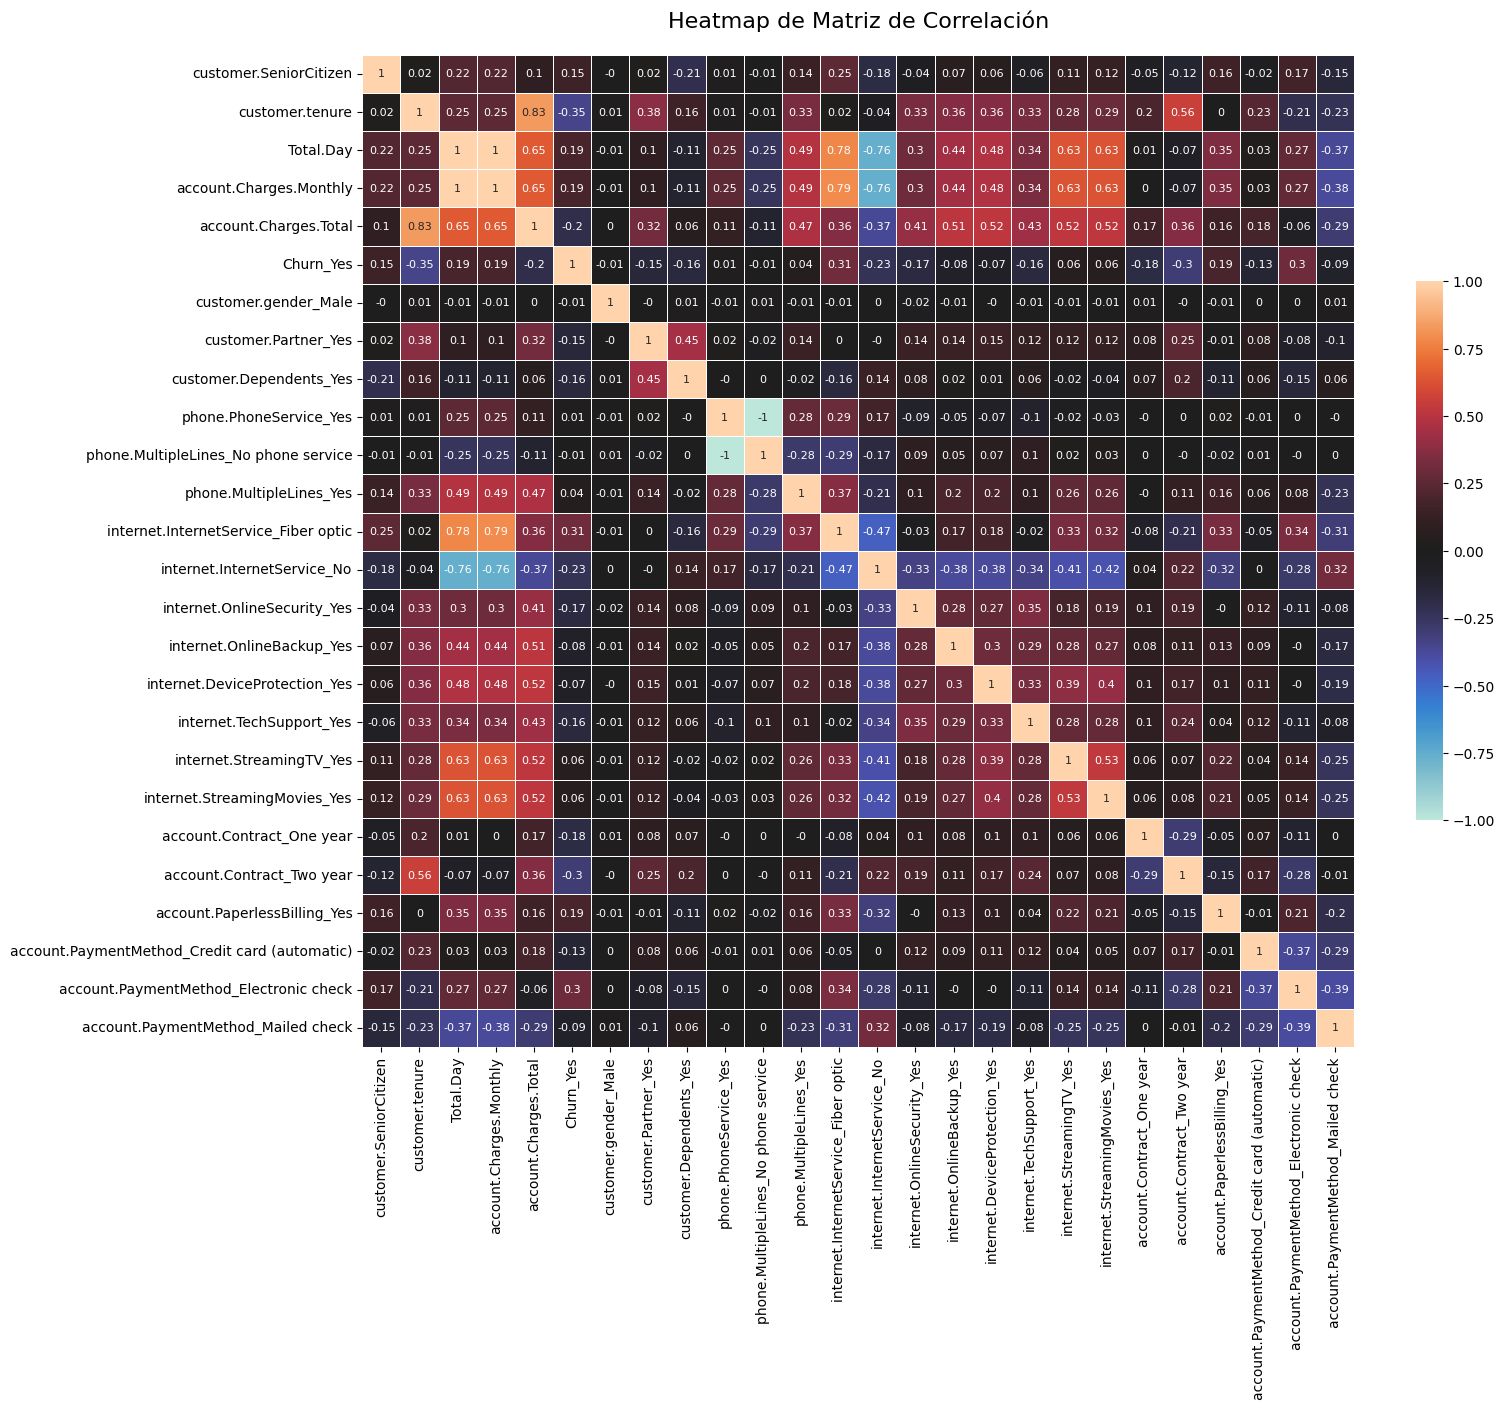

In [152]:
import numpy as np

fig, ax = plt.subplots(figsize=(16,14))
ax = sns.heatmap(
    np.round(corr, 2),
    vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5,
    annot=True,
    annot_kws={"size": 8},
    cbar_kws={"shrink": .5}
)
plt.title("Heatmap de Matriz de Correlación", fontsize=16, pad=20)
plt.show()

In [153]:
print(corr.columns)  # o corr.index, que es igual

Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes',
       'internet.StreamingTV_Yes', 'internet.StreamingMovies_Yes',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')


Para hacer el *heatmap* más legible y enfocado en las relaciones importantes, lo vamos a reducir a un umbral de 0.2. Esto significa que solo vamos a mirar variables cuya correlación con `"Evasión"` sea alta, ya sea en positivo (alta evasión) o negativo (baja evasión). $$|\text{Churn}|\geq 0.2$$

Adicionalmente, crearemos una máscara para ocultar el triángulo superior de la matriz. Esto se puede hacer porque dicha matriz es simétrica respecto de la diagonal, por lo que la parte oculta no aporta más información.


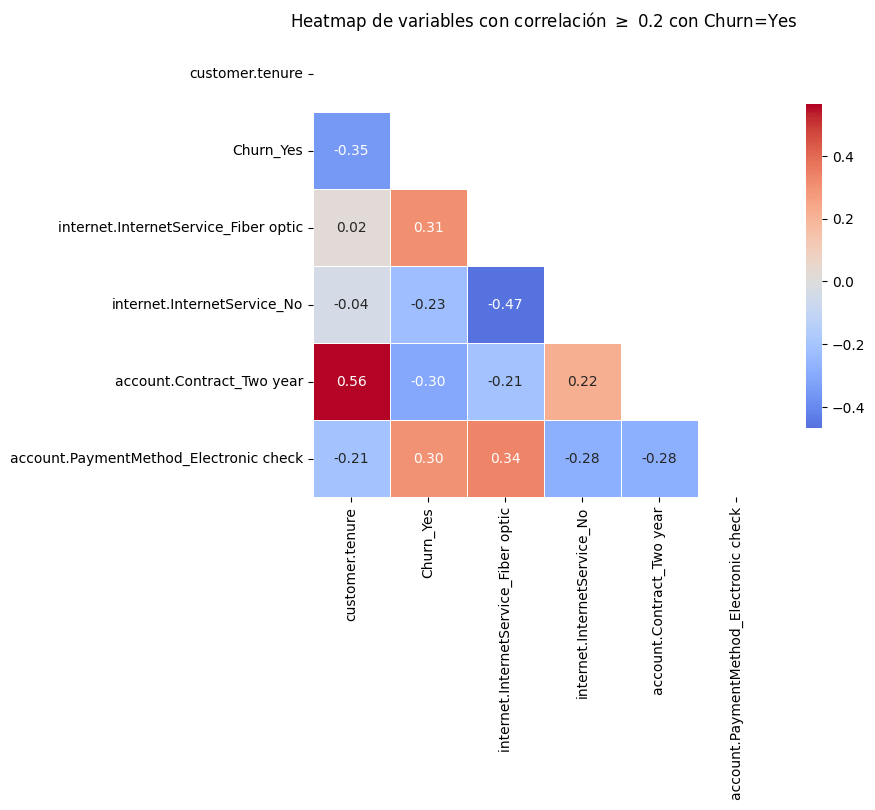

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para la selección
umbral = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación $\geq$ {umbral} con Churn=Yes')
plt.show()

---

**Análisis del nuevo heatmap de correlación** recordando que el gráfico muestra $|\text{evasion}|\geq 0.2$ con la variable objetivo `Churn_Yes`.

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


## Análisis Dirigido

**Investigando cómo las variables específicas más relevantes se relacionan con la cancelación.**

Histograma con KDE mostrando la distribución de antigüedad de clientes que hicieron Churn.

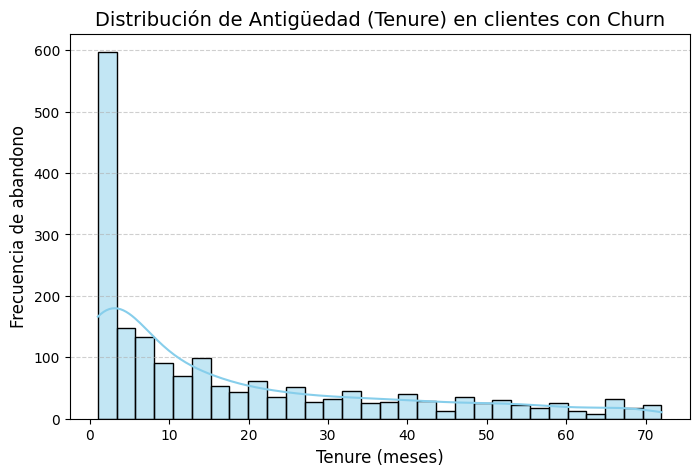

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_churn_tenure_histogram(df):
    """
    histograma
    """
    # Filtramos solo los que abandonaron
    churn_df = df[df["Churn_Yes"] == 1]

    plt.figure(figsize=(8,5))
    sns.histplot(churn_df["customer.tenure"],
                 kde=True,
                 bins=30,
                 color="skyblue",
                 edgecolor="black")

    plt.title("Distribución de Antigüedad (Tenure) en clientes con Churn", fontsize=14)
    plt.xlabel("Tenure (meses)", fontsize=12)
    plt.ylabel("Frecuencia de abandono", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

plot_churn_tenure_histogram(df_encoded)

Es claro que los clientes con menos antigüedad abandonan más, es especialmente notorio por debajo de los 10 meses.

Boxplot de distribución de clientes por antigüedad en el servicio que hicieron Churn.

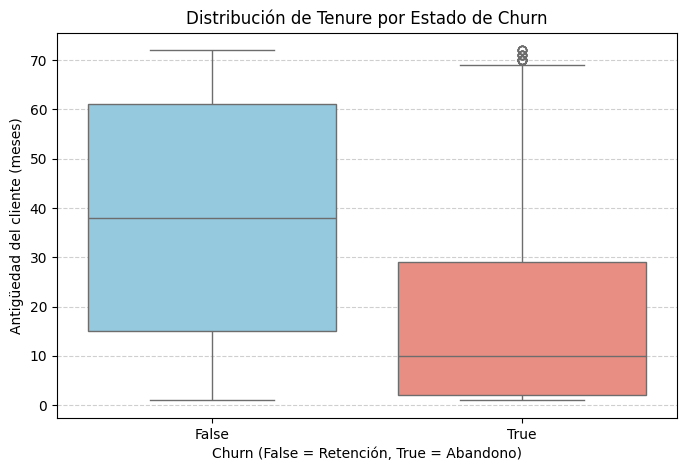

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

ax = sns.boxplot(
    x='Churn_Yes',
    y='customer.tenure',
    data=df_encoded,
    hue='Churn_Yes',              # asigna hue para mapear colores
    dodge=False,                  # evita duplicación de cajas
    palette={False: "skyblue", True: "salmon"}
)

plt.xlabel("Churn (False = Retención, True = Abandono)")
plt.ylabel("Antigüedad del cliente (meses)")
plt.title("Distribución de Tenure por Estado de Churn")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Eliminar leyenda correctamente
ax.get_legend().remove()

plt.show()


**Abandono por Fibra Óptica**

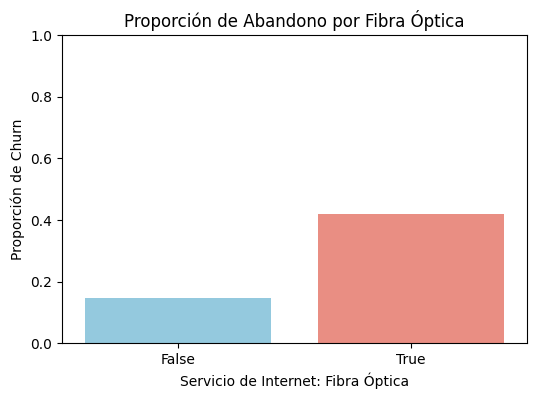

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular proporciones de Churn por fibra óptica
prop_df = df_encoded.groupby('internet.InternetService_Fiber optic')['Churn_Yes'].mean().reset_index()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x='internet.InternetService_Fiber optic',
    y='Churn_Yes',
    hue='internet.InternetService_Fiber optic',  # hue para mapear colores correctamente
    data=prop_df,
    dodge=False,  # evita duplicación de barras
    palette={False: "skyblue", True: "salmon"}
)

plt.xlabel("Servicio de Internet: Fibra Óptica")
plt.ylabel("Proporción de Churn")
plt.title("Proporción de Abandono por Fibra Óptica")
plt.ylim(0, 1)

# Eliminar la leyenda duplicada
ax.get_legend().remove()

plt.show()

**Abandono de clientes sin servicio de internet**

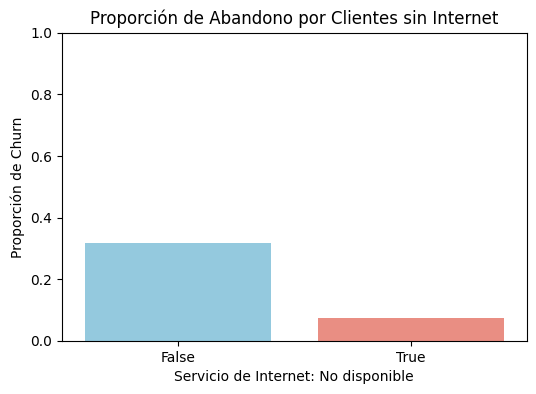

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular proporciones de Churn por "No internet service"
prop_df_no = df_encoded.groupby('internet.InternetService_No')['Churn_Yes'].mean().reset_index()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x='internet.InternetService_No',
    y='Churn_Yes',
    hue='internet.InternetService_No',  # hue para mapear colores correctamente
    data=prop_df_no,
    dodge=False,  # evita duplicación de barras
    palette={False: "skyblue", True: "salmon"}
)

plt.xlabel("Servicio de Internet: No disponible")
plt.ylabel("Proporción de Churn")
plt.title("Proporción de Abandono por Clientes sin Internet")
plt.ylim(0, 1)

# Eliminar la leyenda duplicada
ax.get_legend().remove()

plt.show()


Los clientes sin internet tienden a abandonar menos, lo cual concuerda con los datos de la matriz de correlación (negativa).

In [162]:
df_encoded['account.Contract_Two year'].head(5)

,account.Contract_Two year
0,False
1,False
2,False
3,False
4,False


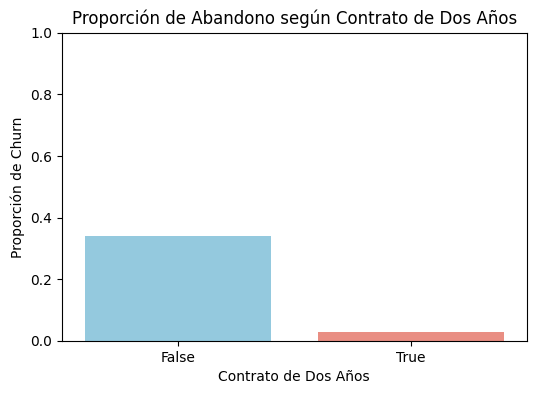

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular proporciones de Churn por contrato de dos años
prop_df_contract = df_encoded.groupby('account.Contract_Two year')['Churn_Yes'].mean().reset_index()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x='account.Contract_Two year',
    y='Churn_Yes',
    hue='account.Contract_Two year',  # hue para mapear colores correctamente
    data=prop_df_contract,
    dodge=False,
    palette={False: "skyblue", True: "salmon"}
)

plt.xlabel("Contrato de Dos Años")
plt.ylabel("Proporción de Churn")
plt.title("Proporción de Abandono según Contrato de Dos Años")
plt.ylim(0, 1)

# Eliminar la leyenda duplicada
ax.get_legend().remove()

plt.show()


Finalmente procedemos a analizar cheque electrónico, que es la última variable que la matriz de correlación nos mostró que es significativamente alta.

**Método de pago: Cheque electrónico.**

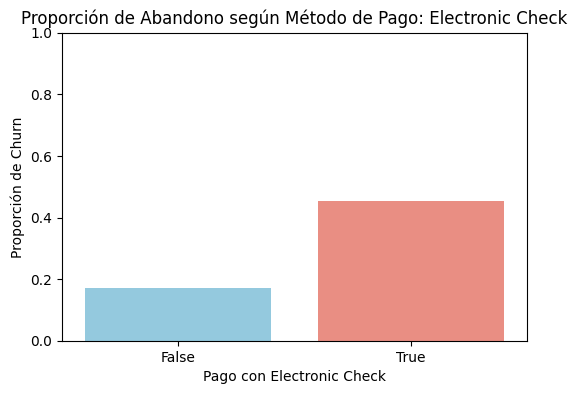

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular proporciones de Churn por método de pago "Electronic check"
prop_df_payment = df_encoded.groupby('account.PaymentMethod_Electronic check')['Churn_Yes'].mean().reset_index()

plt.figure(figsize=(6,4))

ax = sns.barplot(
    x='account.PaymentMethod_Electronic check',
    y='Churn_Yes',
    hue='account.PaymentMethod_Electronic check',  # hue para mapear colores correctamente
    data=prop_df_payment,
    dodge=False,
    palette={False: "skyblue", True: "salmon"}
)

plt.xlabel("Pago con Electronic Check")
plt.ylabel("Proporción de Churn")
plt.title("Proporción de Abandono según Método de Pago: Electronic Check")
plt.ylim(0, 1)

# Eliminar la leyenda duplicada
ax.get_legend().remove()

plt.show()


El Churn por cheque electrónico demuestra ser significativamente, procedemos a hacer un boxplot para ver más en detalle qué está ocurriendo.

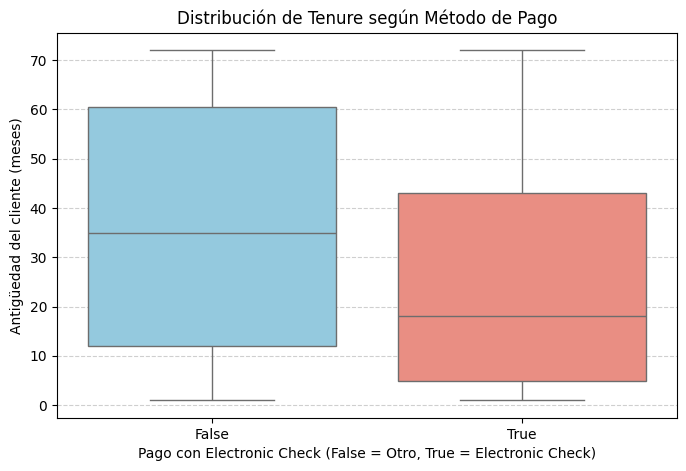

In [165]:
plt.figure(figsize=(8,5))

ax = sns.boxplot(
    x='account.PaymentMethod_Electronic check',  # ahora la variable categórica es el método de pago
    y='customer.tenure',
    data=df_encoded,
    hue='account.PaymentMethod_Electronic check',  # mapear colores por la misma variable
    dodge=False,
    palette={False: "skyblue", True: "salmon"}
)

plt.xlabel("Pago con Electronic Check (False = Otro, True = Electronic Check)")
plt.ylabel("Antigüedad del cliente (meses)")
plt.title("Distribución de Tenure según Método de Pago")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Eliminar leyenda duplicada
ax.get_legend().remove()

plt.show()


Se puede observar claramente cómo los clientes con este método de pago abandonan el servicio bastante rápido, se requiere estrategia de fidelización.

## Análisis de Multicolinealidad


1. Importar las bibliotecas necesarias


In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [168]:
X = df_encoded.drop(columns=['Churn_Yes'])

3. Añadir constante (intercepto)

In [99]:
X_const = add_constant(X)

4. Calcular el Factor de Inflación de la Varianza (VIF)

**Resumen general del análisis VIF**

El análisis VIF (Variance Inflation Factor) permite detectar multicolinealidad en un conjunto de variables independientes. Valores altos de VIF indican que una variable está altamente correlacionada con otras, lo que puede inflar los errores de los coeficientes en modelos de regresión y dificultar la interpretación. Detectarlo ayuda a decidir si eliminar o combinar variables para mejorar la estabilidad y confiabilidad del modelo.

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta  |

---

In [170]:
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Redondear la columna VIF a 2 decimales
vif_data["VIF"] = vif_data["VIF"].round(2)

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.62
12,internet.InternetService_Fiber optic,148.50
3,Total.Day,133.79
13,internet.InternetService_No,104.22
19,internet.StreamingMovies_Yes,24.16
18,internet.StreamingTV_Yes,24.08
5,account.Charges.Total,10.87
2,customer.tenure,7.61


**Principales alertas**

1. Dos variables tienen VIF 'inf' (infinito $\infty$): `phone.PhoneService_Yes` y `phone.MultipleLines_No phone service`, lo cual indica que siguen siendo perfectamente colineales entre sí o con otra variable. Posiblemente debido a que ambas provienen de la misma variable categórica original (PhoneService), y el encoding generó redundancia. Si el cliente no tiene teléfono, entonces no puede tener múltiples líneas, por lo que los valores están 100% ligados.

2. `account.Charges.Monthly` es extremadamente alto. Esta variable está altamente correlacionada con `account.Charges.Total` y `Total.Day`.

3. Otros VIFs altos (moderados a severos):

| Variable |  Comentario |
| --------------------------------- | ------------------------------------------- |
| `InternetService_Fiber optic`     |  Altamente colineal con `InternetService_No` |
| `InternetService_No`              |  Mismo motivo anterior                       |
| `StreamingTV` / `StreamingMovies` |  Dependen directamente de tener internet     |
| `Charges.Total`                   |  Relacionado con `Monthly` y `tenure`        |




Corrigiendo las alertas detectadas

In [171]:
##from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Eliminar variables con multicolinealidad perfecta (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Eliminar redundancias fuertes entre variables numéricas ======
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Eliminar redundancia entre dummies de la misma variable categórica ======
# Se utilizó get_dummies sin drop_first, tienes dummies redundantes para InternetService.
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantizar que los datos estén en float para que el VIF funcione ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular el VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Mostrar los resultados ======
vif_data["VIF"] = vif_data["VIF"].round(2) #Redondeado a 2 decimales
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.50
3,account.Charges.Monthly,18.17
4,account.Charges.Total,10.71
2,customer.tenure,7.55
9,internet.InternetService_Fiber optic,7.00
17,account.Contract_Two year,2.53
14,internet.StreamingTV_Yes,2.19
15,internet.StreamingMovies_Yes,2.19
20,account.PaymentMethod_Electronic check,1.97
21,account.PaymentMethod_Mailed check,1.85


Análisis del nuevo VIF


| Variable                  | VIF     | Observaciones                                                                               |
| ------------------------- | ------- | ------------------------------------------------------------------------------------------- |
| `account.Charges.Monthly` | 18.17   | Aún con multicolinealidad alta — puede estar correlacionada con `Charges.Total` y `tenure`. |
| `account.Charges.Total`   | 10.71   | Justo en el límite — posible redundancia con `Monthly` y `tenure`                           |
| `const`                   | 36.50   | **Normal** para la constante (`const`) — se puede ignorar                                   |
| Resto                     | 1.0–7.5 | Todos con VIF **aceptable u óptimo**                                                      |



La multicolinealidad crítica fue resuelta (sin $\infty$, sin redundancia perfecta). Solo `Charges.Monthly` y `Charges.Total` siguen colineales entre sí.




Hacemos un nuevo VIF eliminando una de las dos variables ("Monthly" o "Total") para reducir el VIF y simplificar. Luego se recalcula el VIF para confirmar que el problema desaparece.

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


**Normalización de los datos**

En este proyecto, aplicaremos la normalización Min-Max, que transforma los valores al rango \[0, 1]. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo.

In [173]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas en df_encoded
columnas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización a df_encoded
df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])

# Mostrando los datos normalizados
df_encoded.head()

/tmp/ipython-input-1899260306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded[columnas_numericas] = scaler.fit_transform(df_encoded[columnas_numericas])


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0.112676,0.484680,0.471144,0.066294,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0.0,0.112676,0.431755,0.414428,0.060420,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0.0,0.042254,0.523677,0.553731,0.030239,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1.0,0.169014,0.754875,0.793532,0.140670,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1.0,0.028169,0.699164,0.653234,0.028687,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


## Modelos Predictivos


Importación de las bibliotecas

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar *features* y *target*

In [175]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir entrenamiento y prueba


In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Normalizar**

* Vamos a entrenar "Regresión Logística", que se beneficia de la normalización.

* En cambio, "Random Forest" no necesita normalización, pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [178]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Balancear entrenamiento con SMOTE, porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [179]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [180]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453651312041925
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [181]:
import pickle

# Guardar el modelo entrenado
with open("modelo_logistic.pkl", "wb") as f:
    pickle.dump(lr, f)

# Cargar el modelo después
with open("modelo_logistic.pkl", "rb") as f:
    lr_cargado = pickle.load(f)

# Verificar que funciona
y_pred_cargado = lr_cargado.predict(X_test_scaled)
print("Exactitud (modelo cargado):", accuracy_score(y_test, y_pred_cargado))


Exactitud (modelo cargado): 0.7502369668246446


**Random Forest**

In [182]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241531250683265
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [183]:
import pickle

# Guardar el modelo entrenado
with open("modelo-randomforest.pkl", "wb") as f:
    pickle.dump(rf, f)

# Cargar el modelo después
with open("modelo-randomforest.pkl", "rb") as f:
    rf_cargado = pickle.load(f)

# Verificar que funciona
y_pred_cargado = rf_cargado.predict(X_test_scaled)
print("Exactitud (modelo cargado):", accuracy_score(y_test, y_pred_cargado))



Exactitud (modelo cargado): 0.7786729857819905


## Evaluación de los Modelos

Por simplicidad llamaremos a la "Regresión Logística" (RL) y a "Random Forest" (RF).

1. Exactitud (Accuracy)

*   RL: 0.75
*   RF: 0.78
> El Random Forest obtiene una exactitud levemente mayor.



2. ROC AUC

* RL: 0.845 (mejor discriminación entre clases)

* RF: 0.824
> La Regresión Logística diferencia mejor entre clases (mejor capacidad de ranking).

3. Precisión (clase True)

* RL: 0.52

* RF: 0.58
> RF tiene más precisión al identificar positivos, lo que significa menos falsos positivos.

4. Recall (clase True)

* RL: 0.81

* RF: 0.60
> RL es mucho mejor en recuperar verdaderos positivos (menos falsos negativos).

5. F1-score (clase True)

* RL: 0.63

* RF: 0.59
> La RL logra un mejor balance entre precisión y recall.

6. Matriz de confusión (comparación de errores)

* RL:
Falsos positivos: 420, Falsos negativos: 107
>RL prefiere clasificar más positivos (alta sensibilidad), pero a costa de cometer más falsos positivos.

* RF:
Falsos positivos: 242, Falsos negativos: 225
> RF equilibra más FP y FN, pero deja escapar muchos positivos reales.

**Análisis de la Importancia de las Variables**

1. Regresión Logística (coeficientes / odds ratio)

* En este modelo, los coeficientes normalizados (y en mejor práctica sus exponenciales → odds ratio) indican qué tanto cambia la probabilidad de cancelación al variar la variable en 1 unidad.

* customer.tenure (coef. negativo, correlación -0.35): es la variable con mayor peso protector → a mayor permanencia del cliente, menor probabilidad de cancelación. Esto tiene lógica: clientes leales suelen mantener el servicio.

* account.Contract_Two year (coef. negativo, correlación -0.30): reduce fuertemente la probabilidad de churn, ya que los contratos largos "amarran" al cliente.

* internet.InternetService_Fiber optic (coef. positivo, correlación +0.31): aumenta significativamente el riesgo de cancelación. Esto puede reflejar problemas de precio, calidad del servicio o insatisfacción percibida en esa categoría.

* account.PaymentMethod_Electronic check (coef. positivo, correlación +0.30): usuarios que pagan con cheque electrónico muestran mayor propensión a cancelar, posiblemente asociado a un perfil más inestable o menos fidelizado.

* internet.InternetService_No (coef. negativo, correlación -0.23, eliminada en VIF): aunque ya no está en el modelo final, su señal era clara: no tener internet está relacionado con menor churn, porque son clientes que solo usan telefonía y tienden a permanecer estables.

En resumen, la regresión logística resalta como principales predictores tenure y tipo de contrato (factores protectores), mientras que el internet de fibra óptica y el método de pago con cheque electrónico son riesgos importantes de cancelación.

2. Random Forest  
En RF, la importancia se mide por cuánto reduce la impureza cada variable en los splits:
* customer.tenure suele aparecer como la variable más importante, ya que segmenta claramente entre clientes de largo plazo (bajo churn) y corto plazo (alto churn).

* account.Contract_Two year y account.Contract_One year también emergen como muy influyentes, porque dividen a clientes más estables de los de contratos cortos o mes a mes.

* account.Charges.Monthly y account.Charges.Total (aunque eliminaste Charges.Total por multicolinealidad) suelen ser variables relevantes en RF, ya que el gasto mensual ayuda a diferenciar clientes más sensibles al precio.

* internet.InternetService_Fiber optic aparece con importancia elevada, porque separa un grupo de clientes con mayor propensión a cancelar.

* account.PaymentMethod_Electronic check también es relevante, pero no tanto como tenure o contrato.

El Random Forest, al ser no lineal, captura interacciones que la RL no refleja, por ejemplo:

* clientes con poco tenure + fibra óptica + pago con electronic check → alto riesgo de churn.

* clientes con contratos largos + tenure alto → bajo riesgo, independiente de método de pago.

En conclusión, tanto la Regresión Logística como el Random Forest coinciden en que las variables más determinantes para la cancelación son la antigüedad del cliente (tenure) y el tipo de contrato, donde contratos más largos y mayor permanencia reducen significativamente el riesgo de churn, mientras que el uso de Internet de fibra óptica y el pago con electronic check incrementan la probabilidad de cancelación; la diferencia radica en que la Regresión Logística permite interpretar directamente el efecto positivo o negativo de cada variable sobre la probabilidad de churn, lo que facilita la explicación causal, mientras que el Random Forest jerarquiza las variables según su poder de separación y revela interacciones no lineales, mostrando que la combinación de poco tenure, contratos cortos, uso de fibra óptica y pago electrónico con cheque define el perfil de cliente más vulnerable; en definitiva, ambos modelos son complementarios: la RL aporta claridad en la interpretación y el RF mayor potencia predictiva en contextos complejos.


**Estrategias de retención basadas en los resultados obtenidos.**

Con los resultados obtenidos se pueden diseñar estrategias de retención enfocadas en los perfiles con mayor riesgo de cancelación: a los clientes con poco tiempo en la compañía se les pueden ofrecer programas de bienvenida y beneficios en los primeros meses para aumentar su fidelidad temprana; a quienes tienen contratos mes a mes conviene incentivar su migración hacia planes anuales o bianuales mediante descuentos, promociones o servicios adicionales; en el caso de los usuarios con fibra óptica, se recomienda reforzar el soporte técnico proactivo, revisar la relación precio–calidad y ofrecer planes personalizados para reducir la insatisfacción; a los clientes que pagan con electronic check se les puede motivar a cambiar hacia métodos de pago más estables con bonificaciones exclusivas; finalmente, es recomendable integrar un sistema de segmentación basado en los modelos predictivos para identificar en tiempo real a los clientes con mayor riesgo y aplicarles de manera prioritaria estas estrategias de retención.